In [1]:
import pandas as pd
import nltk
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
df = pd.read_csv("/content/gdrive/MyDrive/spam.csv",encoding='latin-1')

dataset_size = len(df)
num_features = len(df.columns)

print("Dataset size:", dataset_size)
print("Number of features:", num_features)

df = df[['v1','v2']]
df.rename(columns={'v2':'messages','v1':'Label'},inplace=True)
df.head(5559)

Dataset size: 5572
Number of features: 5


,Label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5554,ham,Well keep in mind I've only got enough gas for...
5555,ham,Yeh. Indians was nice. Tho it did kane me off ...
5556,ham,Yes i have. So that's why u texted. Pshew...mi...
5557,ham,No. I meant the calculation is the same. That ...


In [6]:
df.isnull().sum()

Label       0
messages    0
dtype: int64

In [7]:
Stopwords = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]',' ',text)
    #remove extra spaces
    text = re.sub(r'\s+',' ',text)
    #remove stopwords
    text = "".join (word for word in text.split() if word not in Stopwords)
    return text

In [8]:
df['clean_text']= df['messages'].apply(clean_text)
df.head()

,Label,messages,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",gojurongpointcrazyavailablebugisngreatworldlae...
1,ham,Ok lar... Joking wif u oni...,oklarjokingwifuoni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,freeentry2wklycompwinfacupfinaltkts21stmay2005...
3,ham,U dun say so early hor... U c already then say...,udunsayearlyhorucalreadysay
4,ham,"Nah I don't think he goes to usf, he lives aro...",nahthinkgoesusflivesaroundthough


In [9]:
X = df['clean_text']
y = df['Label']

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix
def classify(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                               ('tfidf',TfidfTransformer()),
                               ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    y_pred = pipeline_model.predict(x_test)
    print(classification_report(y_test, y_pred, zero_division=1))
    conf = confusion_matrix(y_pred, y_test)
    sns.heatmap(conf)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix

def classify_kfold(model, X, y):
    # k-fold cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                               ('tfidf',TfidfTransformer()),
                               ('clf', model)])
    scores = cross_val_score(pipeline_model, X, y, cv=kfold)
    print('Accuracy:', scores.mean()*100)
    y_pred = cross_val_predict(pipeline_model, X, y, cv=kfold)
    print(classification_report(y, y_pred, zero_division=1))
    conf = confusion_matrix(y, y_pred)
    print(conf)

Accuracy: 86.57573582196699
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      1206
        spam       1.00      0.00      0.00       187

    accuracy                           0.87      1393
   macro avg       0.93      0.50      0.46      1393
weighted avg       0.88      0.87      0.80      1393

Accuracy: 86.59368332917374
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      4825
        spam       1.00      0.00      0.00       747

    accuracy                           0.87      5572
   macro avg       0.93      0.50      0.46      5572
weighted avg       0.88      0.87      0.80      5572

[[4825    0]
 [ 747    0]]


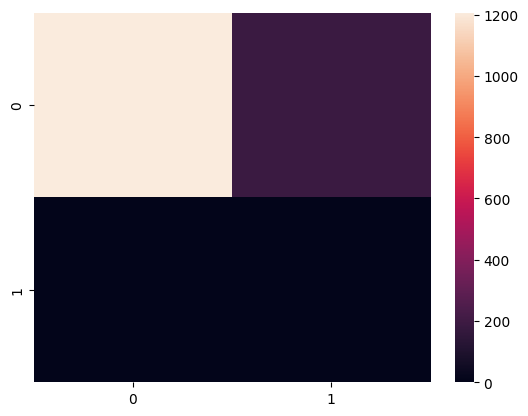

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)
classify_kfold(model, X, y)

Accuracy: 86.71931083991386
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      1206
        spam       1.00      0.01      0.02       187

    accuracy                           0.87      1393
   macro avg       0.93      0.51      0.47      1393
weighted avg       0.88      0.87      0.81      1393

Accuracy: 86.6654322080975
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      4825
        spam       1.00      0.01      0.01       747

    accuracy                           0.87      5572
   macro avg       0.93      0.50      0.47      5572
weighted avg       0.88      0.87      0.81      5572

[[4825    0]
 [ 743    4]]


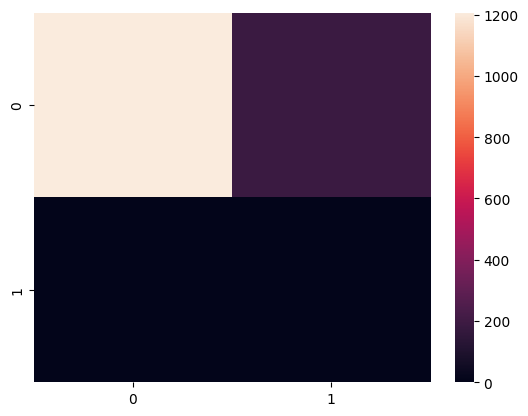

In [14]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model, X, y)
classify_kfold(model, X, y)

Accuracy: 89.44723618090453
              precision    recall  f1-score   support

         ham       0.89      1.00      0.94      1206
        spam       1.00      0.21      0.35       187

    accuracy                           0.89      1393
   macro avg       0.95      0.61      0.65      1393
weighted avg       0.91      0.89      0.86      1393

Accuracy: 90.20088397967974
              precision    recall  f1-score   support

         ham       0.90      1.00      0.95      4825
        spam       1.00      0.27      0.42       747

    accuracy                           0.90      5572
   macro avg       0.95      0.63      0.69      5572
weighted avg       0.91      0.90      0.88      5572

[[4825    0]
 [ 546  201]]


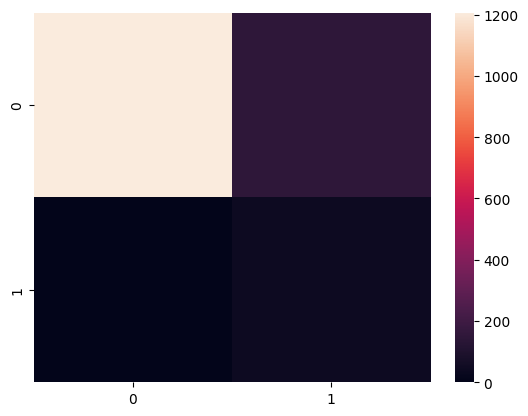

In [15]:
from sklearn.svm import SVC
model = SVC(C=3)
classify(model, X, y)
classify_kfold(model, X, y)